<a href="https://colab.research.google.com/github/Kaustubh-Atey/Codes/blob/master/ML_Classidication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install & Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [20]:
!pip install pipelinehelper
from pipelinehelper import PipelineHelper

# **Load and Visualize Data**

In [214]:
path = '/content/data.csv'      # Path to .csv data file
df = pd.read_csv(path)
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,OutputLabel
0,FACE 1,LOCATING PIN,5,NaN,0,1,0,0,0,1,0.0,0,0
1,FACE 2,LOCATING PIN,1,NaN,0,1,0,0,0,1,45.0,0,1
2,FACE 3,LOCATING PIN,1,NaN,0,1,0,0,0,1,45.0,0,1
3,FACE 4,LOCATING PIN,5,NaN,0,0,0,0,0,0,0.0,0,0
4,FACE 5,LOCATING PIN,2,DIAMOND2,0,1,0,1,0,1,0.0,0,0


In [215]:
# Exploring the data
print('Data shape: ',df.shape)
print(df.info())

Data shape:  (644, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature1     644 non-null    object 
 1   feature2     644 non-null    object 
 2   feature3     644 non-null    int64  
 3   feature4     146 non-null    object 
 4   feature5     644 non-null    int64  
 5   feature6     644 non-null    int64  
 6   feature7     644 non-null    int64  
 7   feature8     644 non-null    int64  
 8   feature9     644 non-null    int64  
 9   feature10    644 non-null    int64  
 10  feature11    644 non-null    float64
 11  feature12    644 non-null    int64  
 12  OutputLabel  644 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 65.5+ KB
None


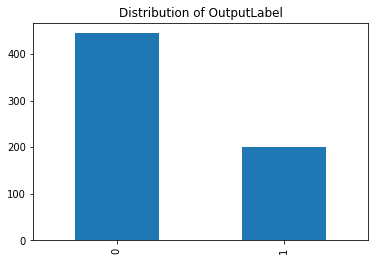

In [216]:
# Check Distribution of the label classes
fig, ax = plt.subplots()
df['OutputLabel'].value_counts().plot(ax=ax, kind='bar')
plt.title('Distribution of OutputLabel')
plt.show()

* The Distribution of the label classes is slightly imbalanced. <br>
* In such cases ***accuracy*** is not the best metric. <br>
* Thus, I have used ***precision***, ***recall*** and ***f1-score*** also to evaluate the model.

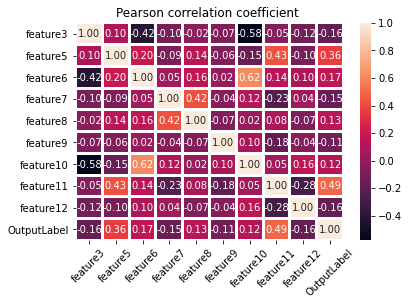

In [217]:
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
plt.title('Pearson correlation coefficient ')
plt.show()

* Some features are highly correlated to the labels ex: ***feature11*** and ***feature5*** <br>
* Also, it can be observed that there is high correlation between some features ex: ***feature6*** and ***feature10*** are highly correlated.

# **Data Preprocessing**

In [218]:
# To check if there is any null/ Nan values in the data
df.isna().sum()

feature1         0
feature2         0
feature3         0
feature4       498
feature5         0
feature6         0
feature7         0
feature8         0
feature9         0
feature10        0
feature11        0
feature12        0
OutputLabel      0
dtype: int64

* As ***feature4*** is a categorical variable, I have used the most frequest category to impute the null values in ***feature4*** <br>


In [219]:
df['feature4'].fillna(df['feature4'].value_counts().index[0], inplace = True)
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,OutputLabel
0,FACE 1,LOCATING PIN,5,3.2 MICRONS [VV],0,1,0,0,0,1,0.0,0,0
1,FACE 2,LOCATING PIN,1,3.2 MICRONS [VV],0,1,0,0,0,1,45.0,0,1
2,FACE 3,LOCATING PIN,1,3.2 MICRONS [VV],0,1,0,0,0,1,45.0,0,1
3,FACE 4,LOCATING PIN,5,3.2 MICRONS [VV],0,0,0,0,0,0,0.0,0,0
4,FACE 5,LOCATING PIN,2,DIAMOND2,0,1,0,1,0,1,0.0,0,0


* ***Label encoding*** the features with text categorical data into the numerical categorical data. <br>
* If these features will be usefull for classification, then convert them into ***one hot encoding***.


In [220]:
le = preprocessing.LabelEncoder()

le.fit(df['feature1'])
df['feature1'] = le.transform(df['feature1'])

le.fit(df['feature2'])
df['feature2'] = le.transform(df['feature2'])

le.fit(df['feature4'])
df['feature4'] = le.transform(df['feature4'])

In [237]:
# Scaling
scaling = preprocessing.MinMaxScaler()
df['feature11'] = scaling.fit_transform(df[['feature11']])

In [222]:
# Split features and labels
X_data = df.iloc[:, 0:-1]
Y_data = df['OutputLabel']

In [223]:
# Split into traing and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=5)

In [224]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(515, 12)
(129, 12)
(515,)
(129,)


# **Feature Selection**

* Here, I have checked the **chi2 scores** of the features wrt the label. <br>
* The features with high scores are more significant for the classification compared to the features with low scores.

In [225]:
select_features = SelectKBest(chi2, k= 'all').fit(X_train, y_train)
select_features_df = pd.DataFrame({'Feature': list(X_train.columns),
                                   'Scores': select_features.scores_})
select_features_df.sort_values(by = 'Scores', ascending = False,)

,Feature,Scores
4,feature5,66.109327
10,feature11,51.794488
11,feature12,13.178232
6,feature7,11.862375
7,feature8,7.098146
8,feature9,7.081232
2,feature3,5.869978
3,feature4,3.203112
5,feature6,2.298955
0,feature1,2.067095


* Selecting the k(=7) best features to include  in the model.

In [226]:
select_features = SelectKBest(chi2, k= 7).fit(X_train, y_train)

In [227]:
X_train = select_features.transform(X_train)
X_test = select_features.transform(X_test)

In [228]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(515, 7)
(129, 7)
(515,)
(129,)


# **Model Building**

In [229]:
def get_score(model, X_train, y_train):
  """
  Takes model and (X,Y) data pair as input
  Return the classification_report & confusion_matrix of model on the data.
  """
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  print(classification_report(y_train, y_pred))
  print(confusion_matrix(y_train, y_pred))

* I'm using the vanilla version of ***KNN***, ***SVM*** and ***Random Forest Classifier*** on the training data.  
* The model performance on training data is displayed.




In [230]:
models = [KNeighborsClassifier(), RandomForestClassifier(), SVC()]
for i in models:
  get_score(i, X_train, y_train)
  print('\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       357
           1       0.60      0.97      0.74       158

    accuracy                           0.79       515
   macro avg       0.79      0.84      0.78       515
weighted avg       0.87      0.79      0.80       515

[[253 104]
 [  4 154]]

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       357
           1       0.79      0.82      0.80       158

    accuracy                           0.88       515
   macro avg       0.85      0.86      0.86       515
weighted avg       0.88      0.88      0.88       515

[[322  35]
 [ 29 129]]

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       357
           1       0.77      0.49      0.60    

*  The above scores reflect that KNN and RF are performing better than the SVM classifier.




*  ***Hyperparameter Tuning*** using the GridSearchCV and doing kFold cross validation on training data.




In [234]:
pipe = Pipeline([
    ('classifier', PipelineHelper([
        ('svm', SVC()),
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ])),
])

params = {

    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'svm__C': [0.1, 1.0],
        'svm__gamma': [5,10,20,25,50],

        'rf__n_estimators': [10,20,50,100],
        'rf__max_depth': [5,8,15,25,30, None],
        'rf__max_leaf_nodes': [2,5,10,15,20],

        'knn__n_neighbors': [3,5,10,20],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']})
}
grid = GridSearchCV(pipe, params, scoring='accuracy',cv = 3, verbose=1)

# **Model Validation**

*   Validation of the best model obtained from the GridSearch on training and test sets.



In [235]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
final_model = grid.best_estimator_
print(get_score(final_model, X_train, y_train))

Fitting 3 folds for each of 146 candidates, totalling 438 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'classifier__selected_model': ('rf', {'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 20})}
0.873770343170588
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       357
           1       0.79      0.82      0.80       158

    accuracy                           0.88       515
   macro avg       0.85      0.86      0.86       515
weighted avg       0.88      0.88      0.88       515

[[322  35]
 [ 29 129]]
None


[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed:   22.6s finished


In [236]:
get_score(final_model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        87
           1       0.78      0.90      0.84        42

    accuracy                           0.88       129
   macro avg       0.86      0.89      0.87       129
weighted avg       0.89      0.88      0.89       129

[[76 11]
 [ 4 38]]


# **Results**

* Grid Search returns: **('rf', {'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 20})** as the best model.
* This is  a ***Random forest*** with the mentioned parameters. 



* The model has good scores in terms of: ***accuracy, precision, recall and f1-score***.
* The model is performing realtively similar on the test set compared to the training set. This suggests that the model has not overfit.
* Model gives good(high) **TP** and **TN** values for both training and test sets.
* The low values of **FP** and **FN** are also an indicator that the model is performing good.



*  As the data is relatively small, I have avioded using ***neural networks*** for this task.
* Traditional ML methods like KNN and RF have worked sufficiently well in this case.

